How many sq. degrees in whole sky.

1) In radians first, define "solid angle" of a region as the area of its platformor to unit sphere

        integral of cos(delta) d(delta) d(theta) on -pi/2 to pi/2, on 0 to 180 
        
        = integral d(theta) on 0 to 180 integral cos(delta) d(delta) on -pi/2 to pi/2
        
        = 2pi - [sin(delta)] on -pi/2 to pi/2 = 2pi(1-(-1)) = 4pi
        
2) In degrees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # linux only
%matplotlib inline

In [2]:
w = .02
d = .7
t = w/d*180/np.pi

In [3]:
t

1.6370222718023522

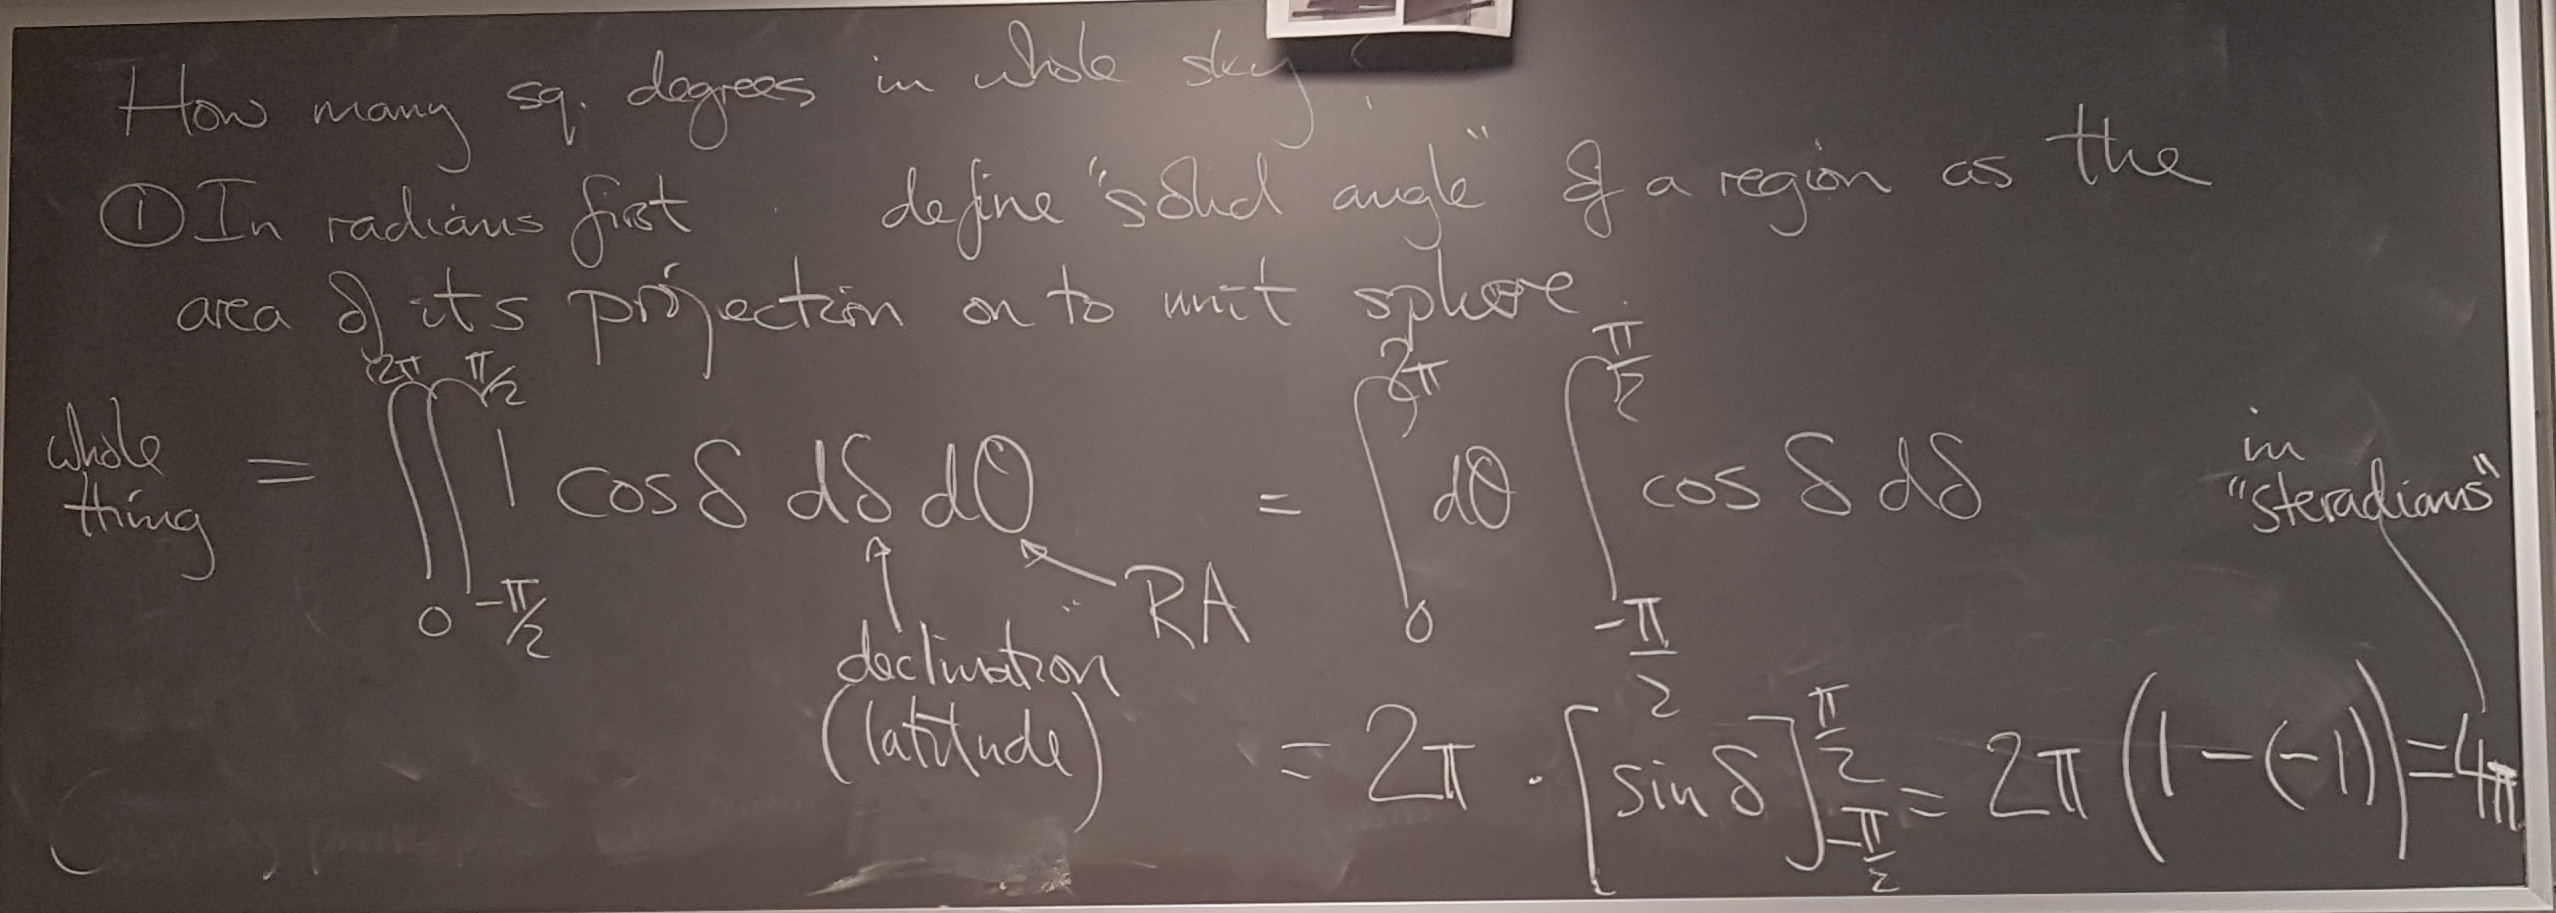

In [4]:
from IPython.display import Image
Image('20191023_155351a.jpg')

# Another API

In [12]:
import requests
from io import StringIO
import pandas as pd

q = '''SELECT
   p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
   s.specobjid, s.class, s.z as redshift
FROM PhotoObj AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE 
   p.ra between 210 and 211.41 and
   p.dec between 10 and 11.39
   '''
url = 'http://skyserver.sdss.org/dr14/SkyServerWS/SearchTools/SqlSearch?cmd={}&format=csv'.format(q.replace(' ','%20'))
r = requests.get(url)
if r.status_code==200:
    csv = StringIO(r.text)
    df = pd.read_csv(csv,skiprows=1)
    display(df.head())
else:
    print('Unsuccessful :-(')

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift
0,1237662239087853861,210.092980,10.165883,21.67009,19.59137,17.82501,17.20300,16.88601,2034649086023460864,GALAXY,0.315913
1,1237662239088247599,211.066655,10.074926,23.22165,22.52912,20.67917,19.74651,19.20074,6136210392936849408,GALAXY,0.499957
2,1237661949191651901,210.165794,10.903702,23.66116,21.72428,20.24295,19.39136,18.99396,6130530315884535808,GALAXY,0.536525
3,1237661949191717610,210.386185,10.854384,22.60789,21.83618,21.72474,21.68392,21.58511,6136328865314742272,STAR,0.000525
4,1237661949191782736,210.493696,10.775069,21.67375,21.59332,20.55522,19.78599,19.59328,6136341234820554752,GALAXY,0.597164


In [13]:
df = pd.read_csv('Skyserver_SQL10_23_2019 6_44_15 PM.csv', skiprows=1)
len(df)
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237657071157182791,23.023789,0.211916,21.14281,20.44086,19.76147,19.52522,19.12745,2700,301,4,19,1215021690438838272,QSO,0.351013,1079,52621,639
1,1237663784744321483,23.002652,0.454132,21.90505,21.84002,21.94102,21.62407,21.66850,4263,301,5,269,8835091992654356480,QSO,1.893790,7847,57012,565
2,1237657071157182541,23.007055,0.370050,19.86981,17.85629,16.60914,16.12137,15.83794,2700,301,4,19,450488361254152192,GALAXY,0.137279,400,51820,467
3,1237663784207450283,23.018093,0.103580,19.54102,17.59023,16.72138,16.57721,16.43841,4263,301,4,269,1215021415560931328,STAR,-0.000016,1079,52621,638
4,1237663784207450854,23.011720,0.119238,23.96580,21.10426,19.46554,18.77933,18.33943,4263,301,4,269,784905379409586176,GALAXY,0.384691,697,52226,557


In [14]:
df['class'].value_counts()

QSO       9
GALAXY    7
STAR      3
Name: class, dtype: int64

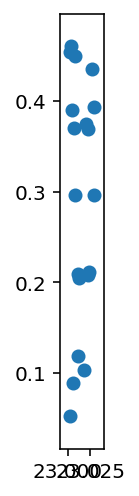

In [16]:
plt.subplot(111, aspect=1/np.cos(10*np.pi/180))
plt.scatter( df['ra'], df['dec'] )

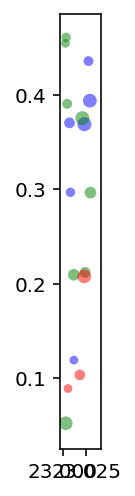

In [17]:
df['brightness'] = (df['g'].max()-df['g'])/(df['g'].max()-df['g'].min())  #makes dimmest=0 and brightest=1
plt.subplot(111,aspect=1/np.cos(10*np.pi/180))
for kind,color in zip(['GALAXY','QSO','STAR'],'bgr'):
    dfx = df[ df['class']==kind ]
    plt.scatter( dfx['ra'], dfx['dec'],c=color, s=50*df['brightness'], alpha=0.5, linewidth=0 )

# Can we recognize triples of stars?

In [21]:
nstars = 5
stars = np.random.rand(2,nstars)
stars

array([[0.89851633, 0.33109769, 0.81893275, 0.63714051, 0.01556718],
       [0.42079637, 0.17240244, 0.58550688, 0.42111522, 0.89559287]])

In [22]:
#take triple from stars and map to the Betsy diagram
#test is worth one report

In [23]:
t = stars[:,:3]
t

array([[0.89851633, 0.33109769, 0.81893275],
       [0.42079637, 0.17240244, 0.58550688]])

In [24]:
def bpt(t):
    # #Given triples find 3 side length & the two indices of the longest side translate 1 to origin
    #rescale so longest lies length 1, rotate so longest is 'horizontal'

SyntaxError: unexpected EOF while parsing (<ipython-input-24-7d82d6d3a25c>, line 3)